# KNN

![](https://miro.medium.com/max/3500/1*uEsLUQ7GdAd1bKIQKG3QCQ.jpeg)

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv')

df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


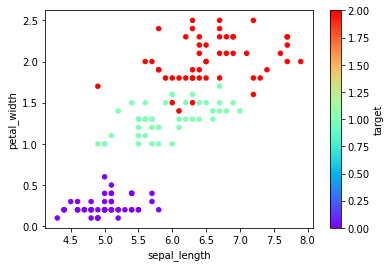

In [2]:
df.plot(kind='scatter', x='sepal_length', y='petal_width',
        c='target', cmap=('rainbow'), sharex=False)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['species', 'target'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=147)

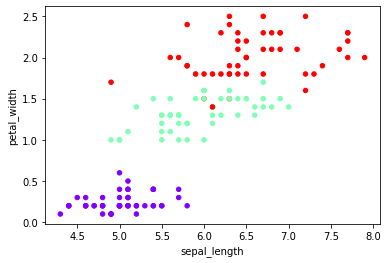

In [4]:
X_train.plot(kind='scatter', x='sepal_length', y='petal_width',
             c=y_train.tolist(), cmap=('rainbow'), sharex=False)

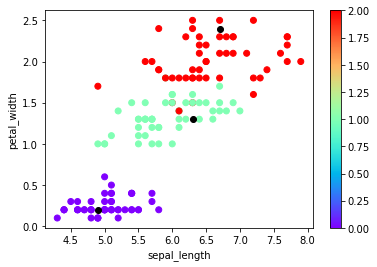

In [5]:
from matplotlib import pyplot as plt

plt.xlabel('sepal_length'), plt.ylabel('petal_width')

# scatter training dataset (rainbow) + colorbar
plt.scatter(x=X_train['sepal_length'], y=X_train['petal_width'],
            c=y_train, cmap='rainbow')
plt.colorbar()

# scatter testing dataset (black)
plt.scatter(x=X_test['sepal_length'], y=X_test['petal_width'],
            color='k')

plt.show()

#### KNN in Sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
knn.predict(X_test)

array([0, 2, 1])

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn.predict(X_test))

1.0

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

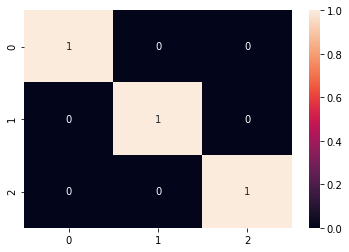

In [11]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True)


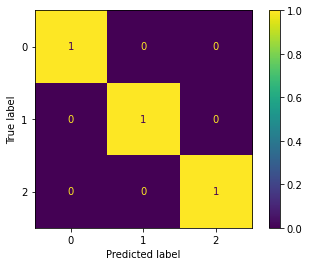

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test)

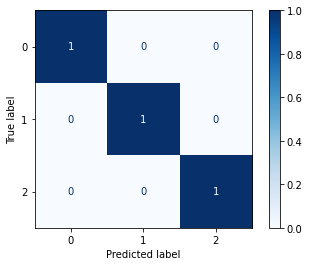

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test, cmap='Blues')

Making it with a worse model...

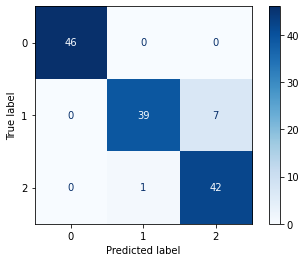

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['species', 'target'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test, cmap='Blues')

In [23]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,target
6,4.6,3.4,1.4,0.3,setosa,0
72,6.3,2.5,4.9,1.5,versicolor,1
18,5.7,3.8,1.7,0.3,setosa,0


In [24]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

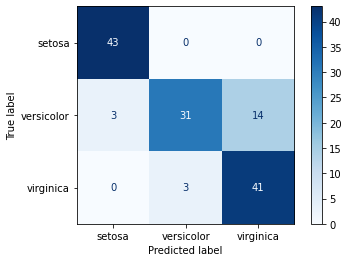

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['species', 'target'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test, cmap='Blues',
                      display_labels=['setosa', 'versicolor', 'virginica'])

### KNN Regression
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [26]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

knn.predict(X_test)

array([0. , 1.6, 1.6, 2. , 0. , 1.6, 1.6, 0. , 2. , 0. , 0. , 1.6, 1.6,
       0. , 0. , 0. , 2. , 0. , 2. , 0. , 1.6, 1.6, 1.8, 2. , 2. , 0. ,
       1.6, 1.6, 2. , 1.6, 0. , 0.8, 0.8, 0. , 1.6, 1.6, 2. , 0. , 1.6,
       0. , 0. , 0. , 1.6, 1.8, 1.8, 1.6, 1.6, 0. , 1.6, 1.8, 0. , 1.6,
       1.8, 0. , 1.6, 2. , 0. , 1.8, 0. , 0. , 1.8, 2. , 0. , 1.6, 2. ,
       0.8, 1.6, 1.8, 1.6, 1.6, 2. , 0. , 0. , 0. , 0. , 0. , 1.6, 1.6,
       2. , 2. , 2. , 1.6, 0. , 2. , 1.6, 1.6, 1.6, 0. , 2. , 0. , 2. ,
       1.6, 0. , 1.6, 1.8, 1.6, 2. , 0. , 1.6, 1.6, 1.6, 1.8, 2. , 1.6,
       2. , 0. , 1.6, 1.6, 2. , 1.6, 1.6, 1.6, 0. , 1.8, 1.6, 0. , 1.8,
       2. , 1.8, 1.6, 0. , 2. , 0. , 2. , 1.6, 0. , 0. , 2. , 2. , 0. ,
       0. , 0.2, 1.6, 1.6, 1.6])

KNN for regression would be great for predicting the price per square foot of a house!

#### Even bigger confusion...

In [28]:
df = pd.read_csv('https://github.com/gumdropsteve/datasets/raw/master/blobs.csv')

df.tail(2)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn,Y
136070,0.236345,3.344960,3.459480,2.973486,-2.281698,2.975151,-2.240754,8.980216,11.347064,-1.916724,5.343498,1.449941,3.535627,8.170794,-7.429858,-7.868080,-9.857213,6.518719,5.919780,7.205406,8.463823,6.028425,-2.417157,4.511888,-8.092650,3.727818,-8.077375,11.141652,-1.456780,-2.800771,-6.242550,6.458926,-4.144237,1.965609,-10.047172,4.293735,2.588063,2.145761,9.725801,2.742198,0
136071,-0.783559,0.426375,3.436725,-9.776984,0.780760,4.009945,-7.040124,-8.266238,-3.962556,-2.910615,0.749933,-0.940078,10.129625,-7.263369,-7.472570,-7.952256,2.257320,-3.730488,-1.415887,-3.873543,-5.062332,-9.331533,3.590447,-8.612234,-5.876197,-2.898096,8.567013,-9.317573,6.403924,-7.794041,9.335192,-0.642014,10.503675,1.216733,4.125021,-8.030931,-7.090919,-7.016749,-5.277755,-6.627469,1


In [29]:
df.Y.value_counts()

1    27215
0    27215
4    27214
3    27214
2    27214
Name: Y, dtype: int64

In [33]:
# sns.pairplot(df.sample(100))

In [35]:
X = df.drop('Y', axis=1)
y = df.Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

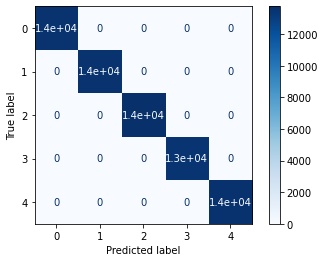

In [36]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')

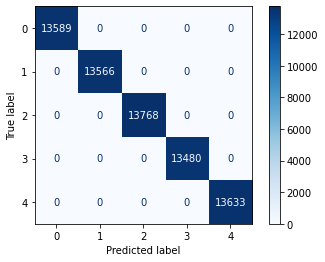

In [38]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

plot_confusion_matrix(knn, X_test, y_test, cmap='Blues', values_format='')